## Criando rotulo para comprar, vender e manter

In [8]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def prepare_data(ticker):
    try:
        # Baixar dados históricos
        data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
        dividends = yf.Ticker(ticker).dividends

        # Remover informações de fuso horário
        dividends.index = dividends.index.tz_localize(None)
        data.index = data.index.tz_localize(None)

        # Calcular Dividend Yield anual
        dividend_yield = (dividends.resample('YE').sum() / data['Close'].resample('YE').mean()).mean()

        # Calcular CAGR
        initial_price = data['Close'].iloc[0]
        final_price = data['Close'].iloc[-1]
        years = (data.index[-1] - data.index[0]).days / 365.25
        cagr = (final_price / initial_price) ** (1 / years) - 1

        # Obter indicadores financeiros adicionais
        ticker_obj = yf.Ticker(ticker)
        info = ticker_obj.info
        roe = info.get('returnOnEquity', None)
        debt_to_equity = info.get('debtToEquity', None)

        # Definir a recomendação baseada nos critérios ajustados
        if (dividend_yield > 0.03 and cagr > 0.10 and roe and roe > 0.15 and debt_to_equity and debt_to_equity < 1.0):
            recomendacao = 'Comprar'
        elif (0.01 <= dividend_yield <= 0.03 and 0.05 <= cagr <= 0.10 and roe and roe > 0.10 and debt_to_equity and debt_to_equity < 1.5):
            recomendacao = 'Manter'
        else:
            recomendacao = 'Vender'

        # Preparar features e target
        features = {
            'Dividend Yield': dividend_yield,
            'CAGR': cagr,
            'ROE': roe,
            'Dívida/Patrimônio': debt_to_equity
        }

        return features, recomendacao

    except Exception as e:
        print(f"Erro ao processar {ticker}: {e}")
        return None, None

# Lista expandida de tickers (exemplos)
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 
    'JNJ', 'JPM', 'V', 'PG', 'UNH',
    'XOM', 'KO', 'WMT', 'DIS', 'NVDA',
    'HD', 'BAC', 'INTC', 'PFE', 'MRK'
]

# Coletar dados
data = []
for ticker in tickers:
    features, recomendacao = prepare_data(ticker)
    if features and recomendacao:
        features['Ticker'] = ticker
        features['Recomendação'] = recomendacao
        data.append(features)

df = pd.DataFrame(data)

print(df)

# Preparar dados para o modelo
X = df[['Dividend Yield', 'CAGR', 'ROE', 'Dívida/Patrimônio']]
y = df['Recomendação']

# Tratar valores ausentes, se houver
X = X.fillna(X.mean())

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Acurácia:", accuracy_score(y_test, y_pred))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

    Dividend Yield      CAGR      ROE  Dívida/Patrimônio Ticker Recomendação
0         0.009999  0.247636  1.60583            151.862   AAPL       Vender
1         0.012026  0.228250  0.37133             36.447   MSFT       Vender
2              NaN  0.104764  0.30871              9.549  GOOGL       Vender
3              NaN  0.071712  0.21933             66.756   AMZN       Vender
4              NaN  0.420443  0.20861             18.606   TSLA       Vender
5         0.026563  0.048849  0.22146             57.999    JNJ       Vender
6         0.028038  0.044419  0.16545                NaN    JPM       Vender
7         0.006568  0.126772  0.48548             51.856      V       Vender
8         0.026895  0.108467  0.30677             66.706     PG       Vender
9         0.014585  0.191458  0.15584             75.678    UNH       Vender
10        0.052804  0.053516  0.14690             15.632    XOM       Vender
11        0.031652  0.069247  0.38772            164.398     KO       Vender

c:\Users\Didico\OneDrive\Python\FIAP\curated\ML_Investimento\.venv\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## Implementando o modelo de ML com LinearRegression

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Modelo para AAPL:
MSE: 3.98, MAE: 1.29
Modelo para MSFT:
MSE: 11.35, MAE: 2.19

Comparação para AAPL:
                 Data    Previsto        Real
2024-08-01 2024-08-01  218.399196  213.309998
2024-08-02 2024-08-02  218.395144  216.240005
2024-08-05 2024-08-05  218.579428  217.529999
2024-08-06 2024-08-06  218.703731  221.270004
2024-08-07 2024-08-07  218.796629  221.720001
2024-08-08 2024-08-08  218.797178  224.720001
2024-08-09 2024-08-09  218.878457  226.050003
2024-08-12 2024-08-12  218.975316  225.889999
2024-08-13 2024-08-13  219.054747  226.509995
2024-08-14 2024-08-14  219.125057  226.399994
2024-08-15 2024-08-15  219.190793  224.529999
2024-08-16 2024-08-16  219.269826  226.839996
2024-08-19 2024-08-19  219.348135  227.179993
2024-08-20 2024-08-20  219.422793  228.029999
2024-08-21 2024-08-21  219.496440  226.490005
2024-08-22 2024-08-22  219.570752  229.789993
2024-08-23 2024-08-23  219.646806  229.000000


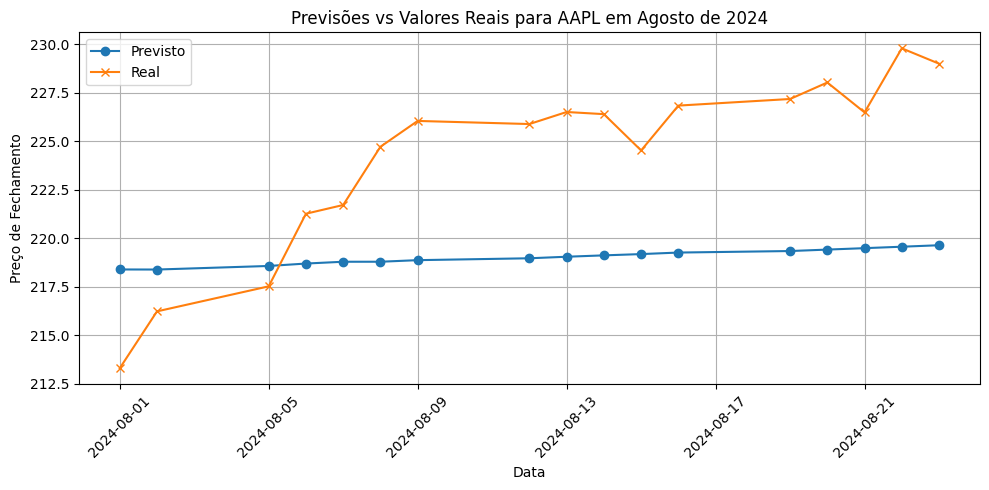


Comparação para MSFT:
                 Data    Previsto        Real
2024-08-01 2024-08-01  424.953596  402.690002
2024-08-02 2024-08-02  424.267607  406.019989
2024-08-05 2024-08-05  425.563331  406.809998
2024-08-06 2024-08-06  425.693364  414.010010
2024-08-07 2024-08-07  425.491353  416.859985
2024-08-08 2024-08-08  426.058223  421.029999
2024-08-09 2024-08-09  426.296155  418.470001
2024-08-12 2024-08-12  426.710932  421.529999
2024-08-13 2024-08-13  426.953314  424.799988
2024-08-14 2024-08-14  427.205885  424.140015
2024-08-15 2024-08-15  427.555719  415.549988
2024-08-16 2024-08-16  427.858653  416.790009
2024-08-19 2024-08-19  428.171920  413.489990
2024-08-20 2024-08-20  428.465754  413.839996
2024-08-21 2024-08-21  428.769075  410.600006
2024-08-22 2024-08-22  429.082721  413.119995
2024-08-23 2024-08-23  429.389169  417.140015


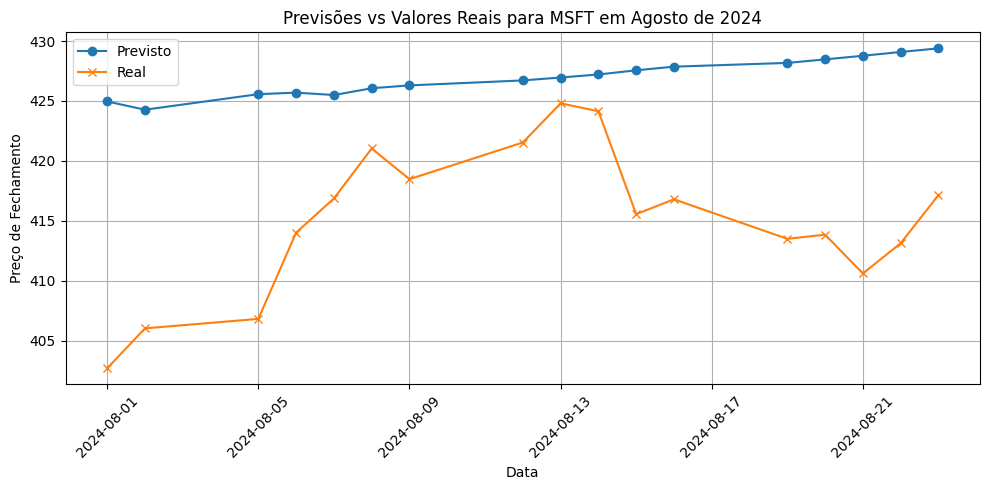

In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Defina os papéis que você deseja analisar
tickers = ['AAPL', 'MSFT']  # Exemplo com Apple e Microsoft
start_date = '2015-01-01'
end_date = '2024-07-31'

# Baixar os dados históricos
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Preparar os dados para cada papel
def prepare_data(df):
    df['Date'] = df.index
    df['Return'] = df['Close'].pct_change()
    df['Moving_Average'] = df['Close'].rolling(window=5).mean()
    df['Volatility'] = df['Return'].rolling(window=5).std()
    df.dropna(inplace=True)
    return df[['Date', 'Close', 'Moving_Average', 'Volatility']]

# Preparar os dados
prepared_data = {}
for ticker in tickers:
    prepared_data[ticker] = prepare_data(data[ticker])

# Treinamento e teste para previsão
def train_and_predict(df, ticker):
    X = df[['Moving_Average', 'Volatility']]
    y = df['Close']

    # Divisão dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelo de Regressão Linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsão
    y_pred = model.predict(X_test)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Modelo para {ticker}:')
    print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

    return model

# Treinamento e previsão para cada papel
models = {}
for ticker in tickers:
    models[ticker] = train_and_predict(prepared_data[ticker], ticker)

# Fazer previsões para agosto de 2024
future_dates = pd.date_range(start='2024-08-01', end='2024-08-31', freq='B')  # Dias úteis
future_data = pd.DataFrame(index=future_dates)

# Prever para cada papel
for ticker in tickers:
    predictions = []
    last_moving_average = prepared_data[ticker]['Moving_Average'].iloc[-1]
    last_volatility = prepared_data[ticker]['Volatility'].iloc[-1]
    last_close = prepared_data[ticker]['Close'].iloc[-1]

    for date in future_dates:
        # Prever o próximo valor
        prediction = models[ticker].predict(np.array([[last_moving_average, last_volatility]]).reshape(1, -1))
        predictions.append(prediction[0])
        
        # Atualiza os dados para a próxima previsão
        new_row = pd.Series({
            'Moving_Average': last_moving_average,
            'Volatility': last_volatility,
            'Close': prediction[0]
        }, name=date)
        
        prepared_data[ticker] = pd.concat([prepared_data[ticker], new_row.to_frame().T])

        # Atualizando os valores para a próxima iteração
        last_close = prediction[0]
        
        # Recalcula 'Return', 'Moving_Average' e 'Volatility'
        prepared_data[ticker]['Return'] = prepared_data[ticker]['Close'].pct_change()
        last_moving_average = prepared_data[ticker]['Close'].rolling(window=5).mean().iloc[-1]
        last_volatility = prepared_data[ticker]['Return'].rolling(window=5).std().iloc[-1]

    future_data[ticker] = predictions

# Baixar dados reais para agosto de 2024
real_data = {}
for ticker in tickers:
    real_data[ticker] = yf.download(ticker, start='2024-08-01', end='2024-09-01')

# Preparar os dados reais
real_data_prepared = {}
for ticker in tickers:
    real_data_prepared[ticker] = prepare_data(real_data[ticker])

# Comparar previsões com dados reais
for ticker in tickers:
    actual_prices = real_data_prepared[ticker]['Close'].values[:len(future_data[ticker])]
    predicted_prices = future_data[ticker]

    # Garantir que ambos tenham o mesmo comprimento
    min_length = min(len(actual_prices), len(predicted_prices))

    comparison_df = pd.DataFrame({
        'Data': future_dates[:min_length],
        'Previsto': predicted_prices[:min_length],
        'Real': actual_prices[:min_length]
    })
    
    print(f'\nComparação para {ticker}:')
    print(comparison_df)

    # Plotar os resultados
    plt.figure(figsize=(10, 5))
    plt.plot(comparison_df['Data'], comparison_df['Previsto'], label='Previsto', marker='o')
    plt.plot(comparison_df['Data'], comparison_df['Real'], label='Real', marker='x')
    plt.title(f'Previsões vs Valores Reais para {ticker} em Agosto de 2024')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Modelo de ML com RandomForestRegressor

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Modelo para AAPL:
MSE: 4.18, MAE: 1.22
Modelo para MSFT:
MSE: 10.15, MAE: 2.07
Modelo para PETR4.SA:
MSE: 0.41, MAE: 0.41
Modelo para VALE3.SA:
MSE: 1.71, MAE: 0.90
Modelo para ITUB4.SA:
MSE: 0.22, MAE: 0.35
Modelo para BBDC4.SA:
MSE: 0.14, MAE: 0.26
Modelo para BBAS3.SA:
MSE: 0.16, MAE: 0.29
Modelo para ABEV3.SA:
MSE: 0.07, MAE: 0.19
Modelo para B3SA3.SA:
MSE: 0.08, MAE: 0.19
Modelo para WEGE3.SA:
MSE: 0.26, MAE: 0.32
Modelo para RENT3.SA:
MSE: 0.91, MAE: 0.62
Modelo para JBSS3.SA:
MSE: 0.30, MAE: 0.38
Modelo para MGLU3.SA:
MSE: 6.03, MAE: 1.38
Modelo para BRFS3.SA:
MSE: 0.49, MAE: 0.50
Modelo para SUZB3.SA:
MSE: 1.09, MAE: 0.79
Modelo para ELET3.SA:
MSE: 0.68, MAE: 0.56


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********


Comparação para AAPL:
                 Data    Previsto        Real
2024-08-01 2024-08-01  218.560804  226.509995
2024-08-02 2024-08-02  218.061205  226.399994
2024-08-05 2024-08-05  218.141505  224.529999
2024-08-06 2024-08-06  218.141505  226.839996
2024-08-07 2024-08-07  218.141505  227.179993
2024-08-08 2024-08-08  218.141505  228.029999
2024-08-09 2024-08-09  218.141505  226.490005
2024-08-12 2024-08-12  218.141505  229.789993
2024-08-13 2024-08-13  218.141505  229.000000


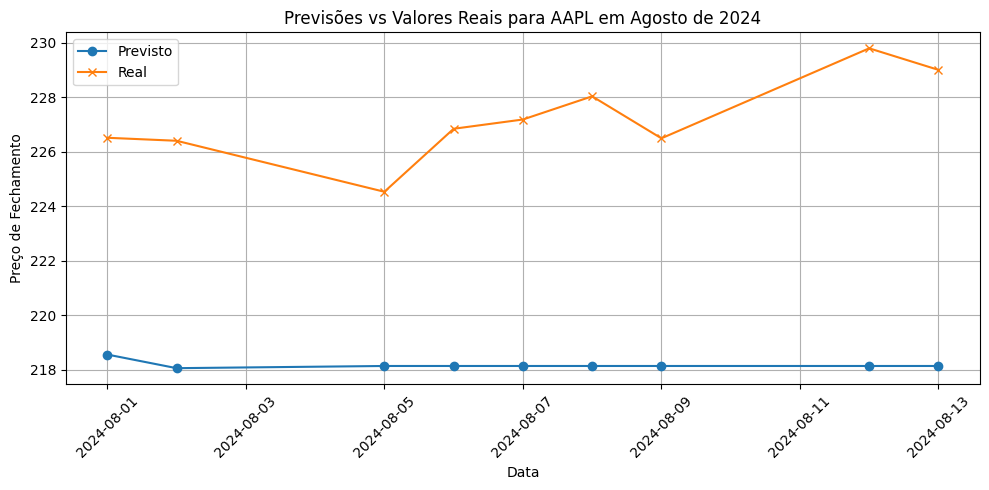


Comparação para MSFT:
                 Data    Previsto        Real
2024-08-01 2024-08-01  421.876809  424.799988
2024-08-02 2024-08-02  415.782704  424.140015
2024-08-05 2024-08-05  416.121504  415.549988
2024-08-06 2024-08-06  415.006501  416.790009
2024-08-07 2024-08-07  414.833399  413.489990
2024-08-08 2024-08-08  414.800299  413.839996
2024-08-09 2024-08-09  413.171999  410.600006
2024-08-12 2024-08-12  411.552699  413.119995
2024-08-13 2024-08-13  409.041198  417.140015


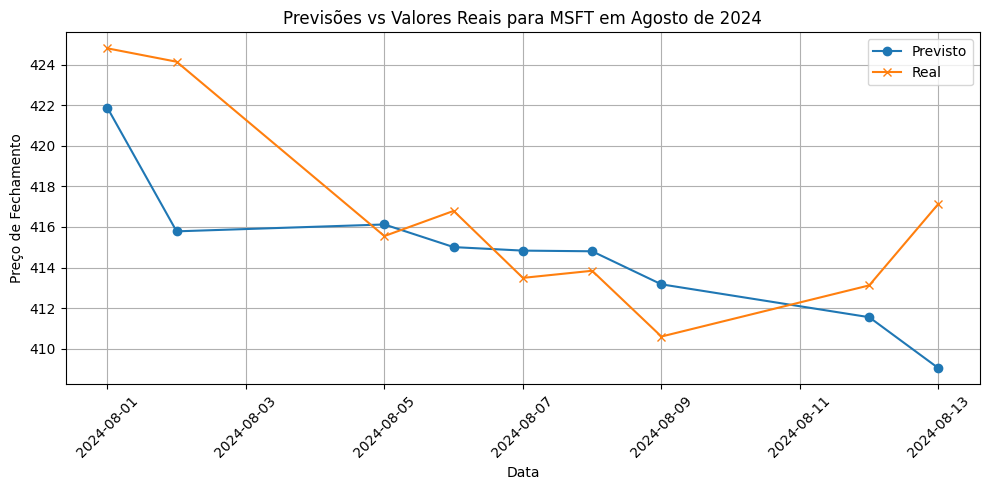


Comparação para PETR4.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  37.036901  38.290001
2024-08-02 2024-08-02  37.350100  38.060001
2024-08-05 2024-08-05  37.558700  37.119999
2024-08-06 2024-08-06  37.638600  36.889999
2024-08-07 2024-08-07  37.430600  39.570000
2024-08-08 2024-08-08  37.511500  39.040001
2024-08-09 2024-08-09  37.683700  39.599998
2024-08-12 2024-08-12  37.704400  39.330002
2024-08-13 2024-08-13  37.891300  39.369999


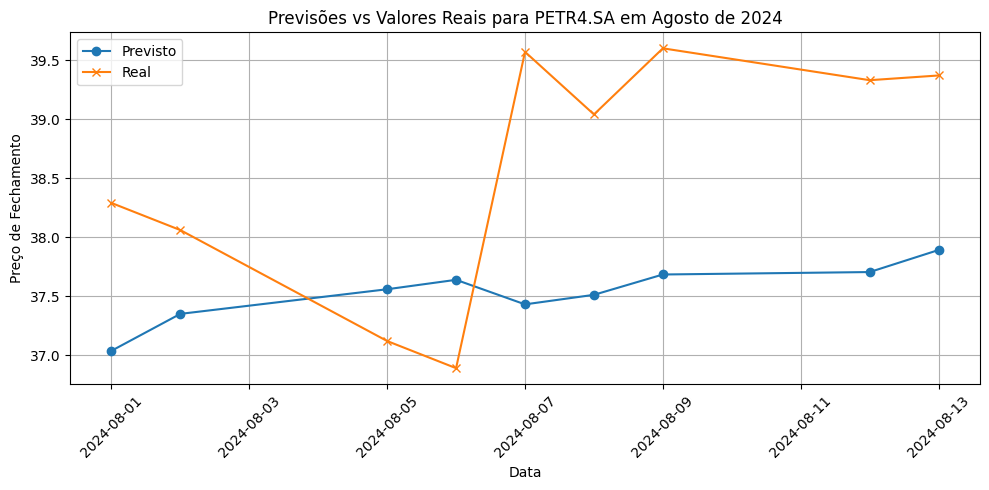


Comparação para VALE3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  60.401801  57.200001
2024-08-02 2024-08-02  60.507601  58.299999
2024-08-05 2024-08-05  60.809400  58.380001
2024-08-06 2024-08-06  60.871600  57.400002
2024-08-07 2024-08-07  59.587601  58.049999
2024-08-08 2024-08-08  59.512501  59.799999
2024-08-09 2024-08-09  59.754201  59.369999
2024-08-12 2024-08-12  59.163401  59.299999
2024-08-13 2024-08-13  59.147200  59.580002


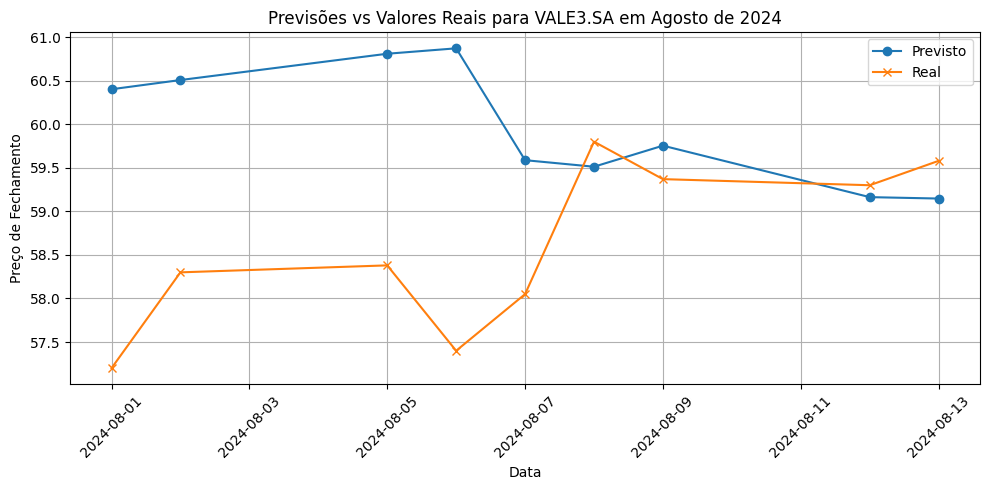


Comparação para ITUB4.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  34.400634  37.230000
2024-08-02 2024-08-02  34.472034  37.080002
2024-08-05 2024-08-05  34.508933  36.740002
2024-08-06 2024-08-06  34.668700  36.459999
2024-08-07 2024-08-07  34.653566  36.540001
2024-08-08 2024-08-08  34.665899  36.580002
2024-08-09 2024-08-09  34.637833  37.369999
2024-08-12 2024-08-12  34.582133  36.959999
2024-08-13 2024-08-13  34.584599  36.700001


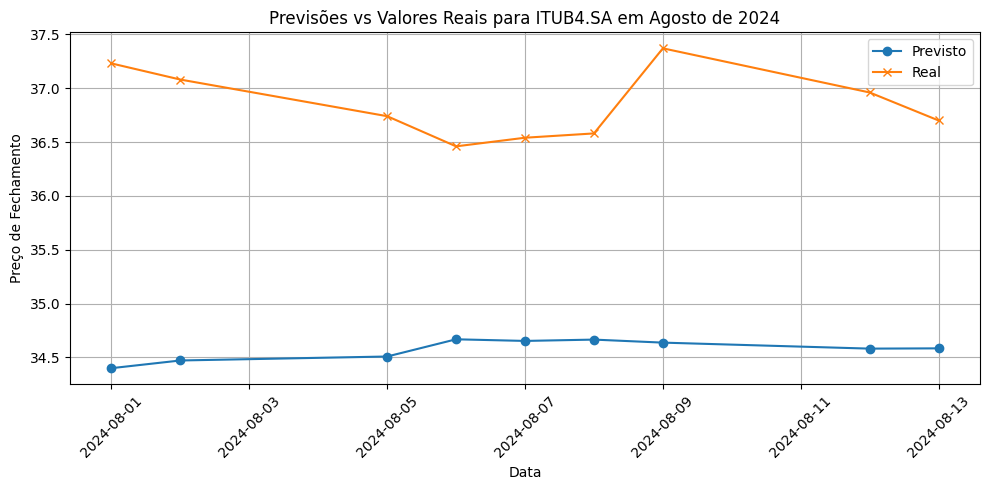


Comparação para BBDC4.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  12.402580  15.70
2024-08-02 2024-08-02  12.416334  15.63
2024-08-05 2024-08-05  12.442434  15.52
2024-08-06 2024-08-06  12.445265  15.66
2024-08-07 2024-08-07  12.449791  15.61
2024-08-08 2024-08-08  12.381023  15.42
2024-08-09 2024-08-09  12.412575  15.67
2024-08-12 2024-08-12  12.445489  15.63
2024-08-13 2024-08-13  12.368886  15.64


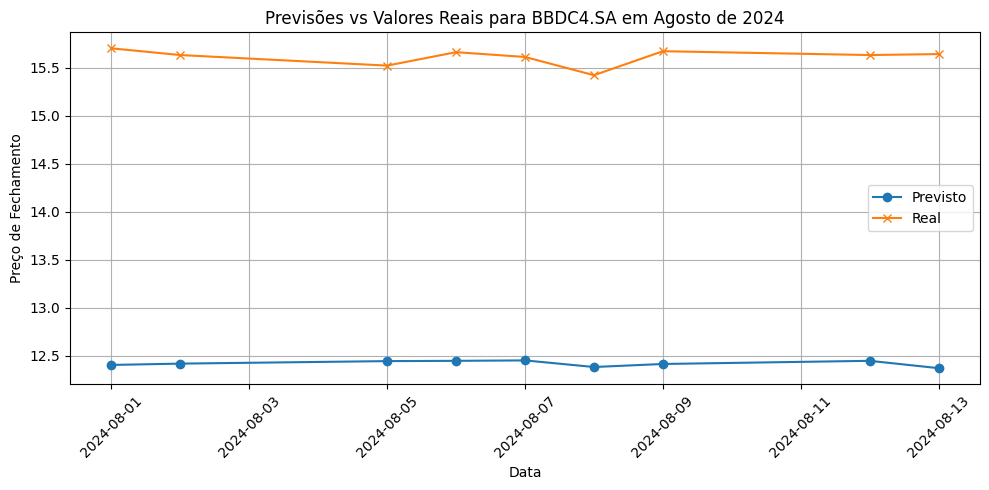


Comparação para BBAS3.SA:
                 Data  Previsto       Real
2024-08-01 2024-08-01  26.94050  29.260000
2024-08-02 2024-08-02  27.05800  29.129999
2024-08-05 2024-08-05  27.11740  28.010000
2024-08-06 2024-08-06  27.14275  28.219999
2024-08-07 2024-08-07  27.11885  28.330000
2024-08-08 2024-08-08  26.91045  28.010000
2024-08-09 2024-08-09  27.05880  28.180000
2024-08-12 2024-08-12  27.05125  28.299999
2024-08-13 2024-08-13  27.04135  28.120001


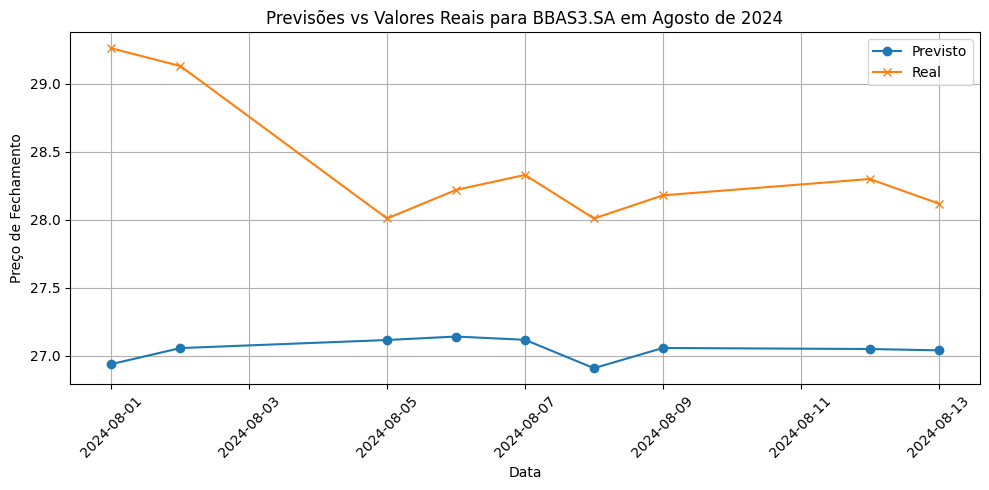


Comparação para ABEV3.SA:
                 Data  Previsto   Real
2024-08-01 2024-08-01   11.6948  12.94
2024-08-02 2024-08-02   11.7568  12.94
2024-08-05 2024-08-05   11.7662  13.00
2024-08-06 2024-08-06   11.7856  13.08
2024-08-07 2024-08-07   11.7749  13.08
2024-08-08 2024-08-08   11.7065  13.03
2024-08-09 2024-08-09   11.7514  12.95
2024-08-12 2024-08-12   11.7611  12.86
2024-08-13 2024-08-13   11.7117  12.86


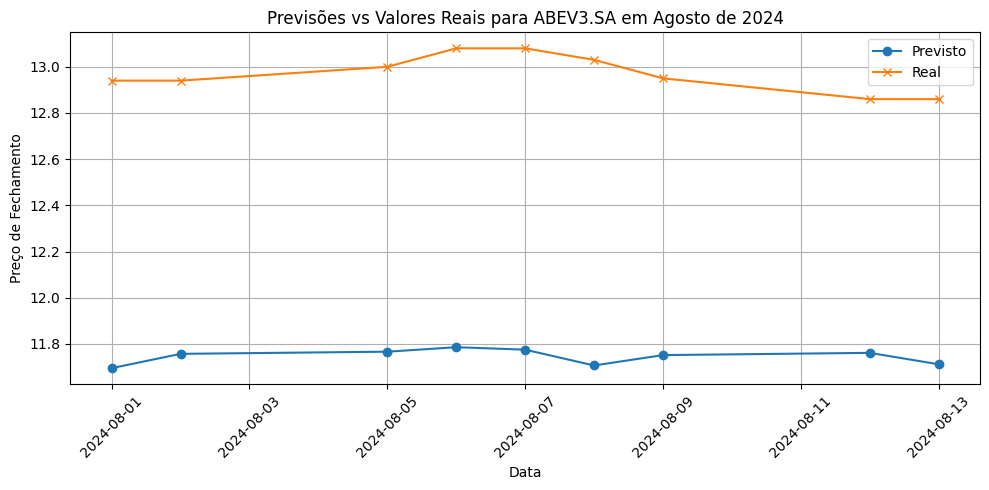


Comparação para B3SA3.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  10.734167  12.90
2024-08-02 2024-08-02  10.672966  12.96
2024-08-05 2024-08-05  10.637933  12.54
2024-08-06 2024-08-06  10.599433  12.74
2024-08-07 2024-08-07  10.559266  12.80
2024-08-08 2024-08-08  10.565767  12.65
2024-08-09 2024-08-09  10.498700  12.70
2024-08-12 2024-08-12  10.524967  12.54
2024-08-13 2024-08-13  10.521667  12.68


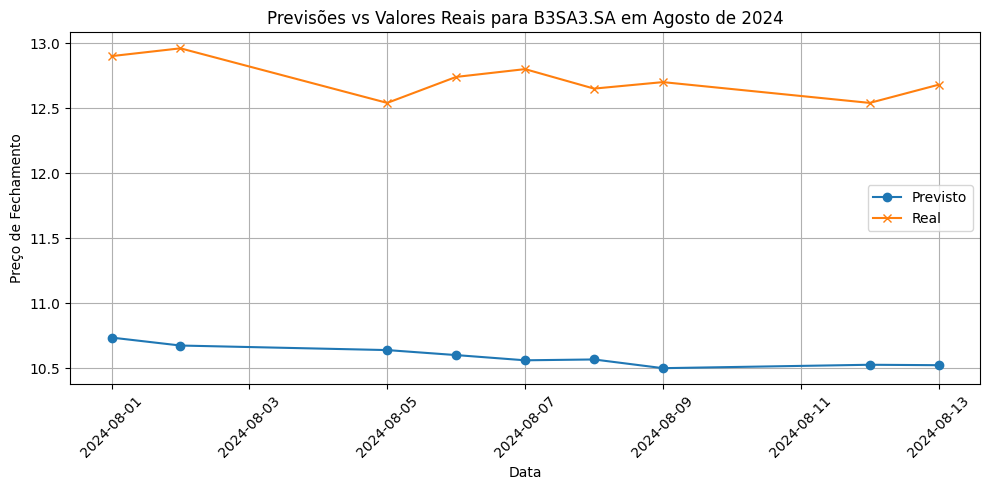


Comparação para WEGE3.SA:
                 Data  Previsto       Real
2024-08-01 2024-08-01  45.99035  53.110001
2024-08-02 2024-08-02  45.95040  53.430000
2024-08-05 2024-08-05  46.12845  54.200001
2024-08-06 2024-08-06  46.12620  53.810001
2024-08-07 2024-08-07  46.11735  54.080002
2024-08-08 2024-08-08  46.04535  54.000000
2024-08-09 2024-08-09  46.05390  54.000000
2024-08-12 2024-08-12  46.06575  53.540001
2024-08-13 2024-08-13  46.05390  54.150002


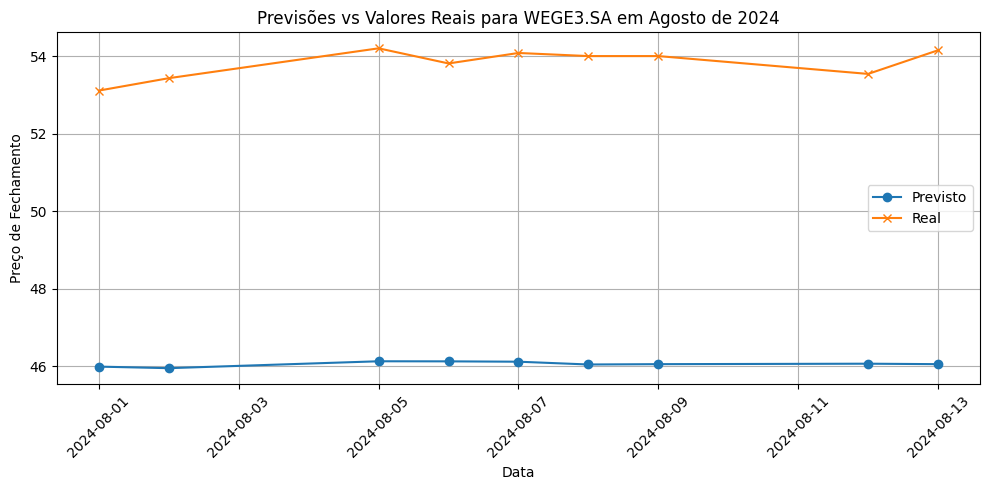


Comparação para RENT3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  42.366019  42.970001
2024-08-02 2024-08-02  42.318104  43.700001
2024-08-05 2024-08-05  41.577549  41.939999
2024-08-06 2024-08-06  41.317677  42.299999
2024-08-07 2024-08-07  41.137386  42.279999
2024-08-08 2024-08-08  40.877261  42.900002
2024-08-09 2024-08-09  40.960130  42.500000
2024-08-12 2024-08-12  40.900168  41.750000
2024-08-13 2024-08-13  40.894567  41.369999


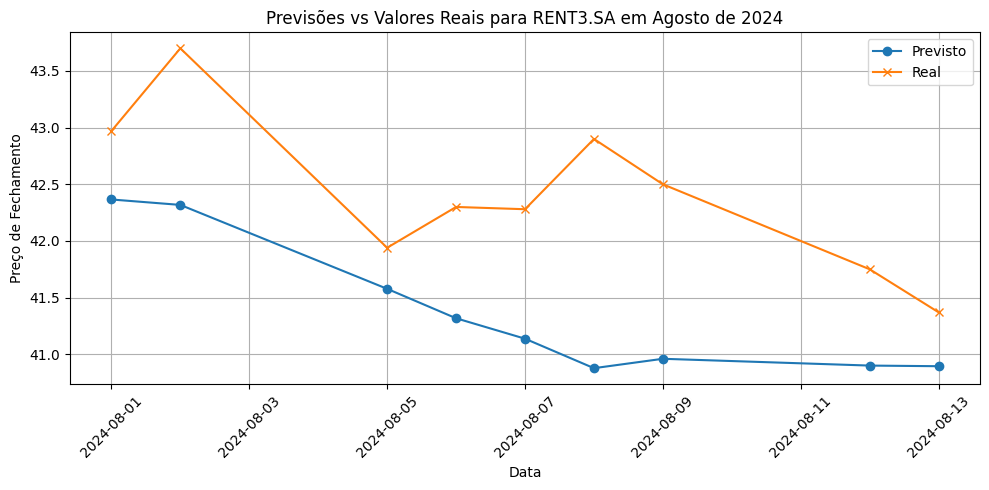


Comparação para JBSS3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  33.914101  36.130001
2024-08-02 2024-08-02  32.457100  36.549999
2024-08-05 2024-08-05  33.010201  36.209999
2024-08-06 2024-08-06  33.610100  34.830002
2024-08-07 2024-08-07  33.581700  35.000000
2024-08-08 2024-08-08  32.789600  34.980000
2024-08-09 2024-08-09  33.102000  35.040001
2024-08-12 2024-08-12  32.663299  34.939999
2024-08-13 2024-08-13  32.597699  35.000000


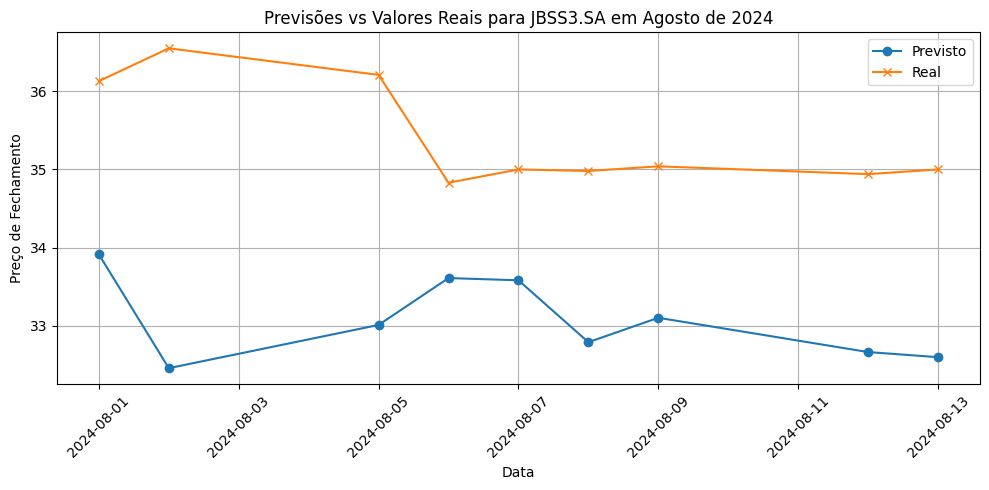


Comparação para MGLU3.SA:
                 Data   Previsto   Real
2024-08-01 2024-08-01  11.246370  13.80
2024-08-02 2024-08-02  11.268970  13.85
2024-08-05 2024-08-05  11.290378  13.18
2024-08-06 2024-08-06  11.262471  13.62
2024-08-07 2024-08-07  11.327971  13.35
2024-08-08 2024-08-08  11.344632  13.47
2024-08-09 2024-08-09  11.290832  13.18
2024-08-12 2024-08-12  11.288724  12.89
2024-08-13 2024-08-13  11.287624  12.16


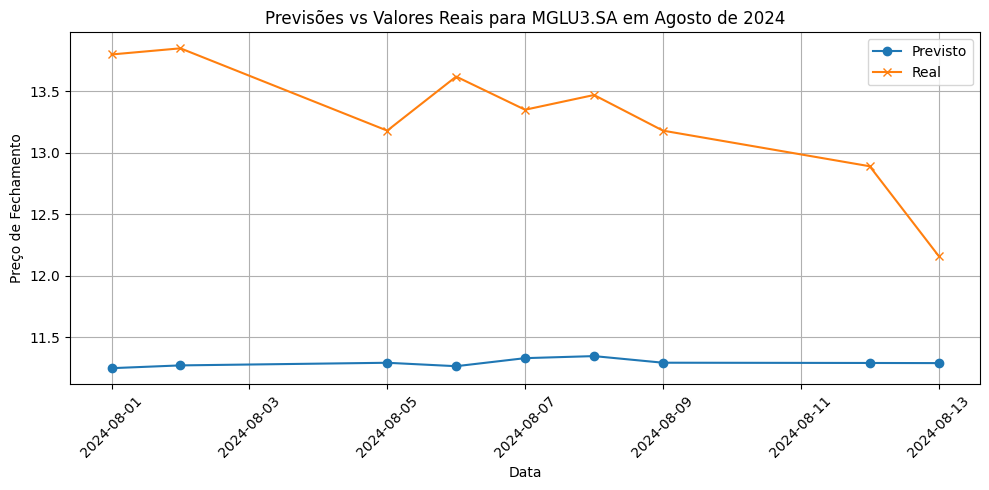


Comparação para BRFS3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  21.259153  25.400000
2024-08-02 2024-08-02  21.018247  26.030001
2024-08-05 2024-08-05  20.879336  25.709999
2024-08-06 2024-08-06  20.851232  25.190001
2024-08-07 2024-08-07  20.849341  25.299999
2024-08-08 2024-08-08  20.797956  25.910000
2024-08-09 2024-08-09  20.859097  26.030001
2024-08-12 2024-08-12  20.697501  25.799999
2024-08-13 2024-08-13  20.307081  26.230000


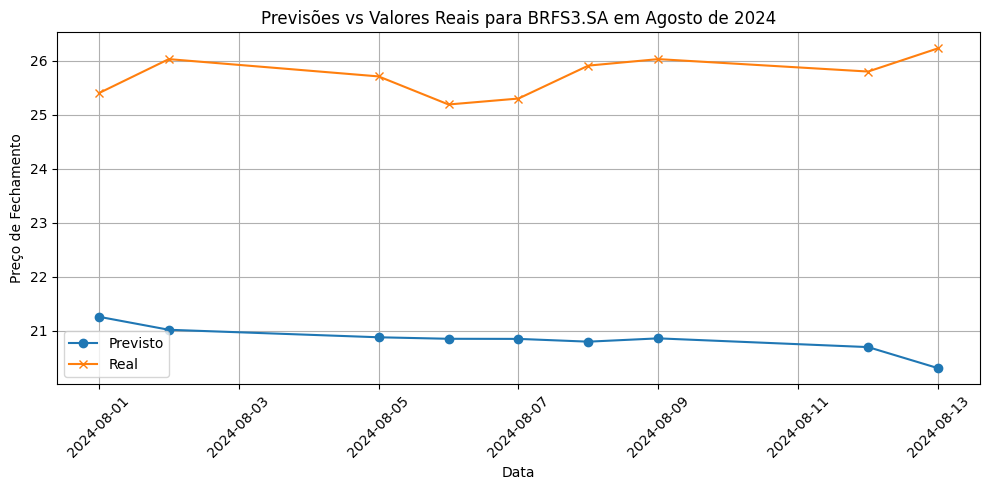


Comparação para SUZB3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  53.237699  55.869999
2024-08-02 2024-08-02  52.774500  56.459999
2024-08-05 2024-08-05  52.856099  56.410000
2024-08-06 2024-08-06  52.544901  56.080002
2024-08-07 2024-08-07  52.611301  55.180000
2024-08-08 2024-08-08  52.262601  55.619999
2024-08-09 2024-08-09  52.398300  56.080002
2024-08-12 2024-08-12  52.363200  55.500000
2024-08-13 2024-08-13  52.754801  55.000000


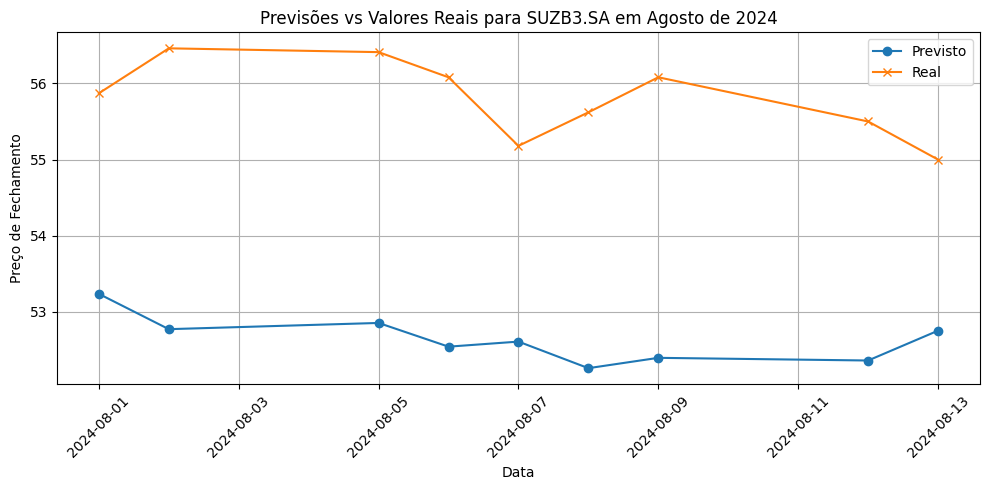


Comparação para ELET3.SA:
                 Data   Previsto       Real
2024-08-01 2024-08-01  37.896201  41.400002
2024-08-02 2024-08-02  38.086200  41.500000
2024-08-05 2024-08-05  38.013358  40.900002
2024-08-06 2024-08-06  38.101300  41.880001
2024-08-07 2024-08-07  38.034400  41.880001
2024-08-08 2024-08-08  38.188700  41.400002
2024-08-09 2024-08-09  38.508454  42.040001
2024-08-12 2024-08-12  38.464879  41.299999
2024-08-13 2024-08-13  38.479664  41.750000


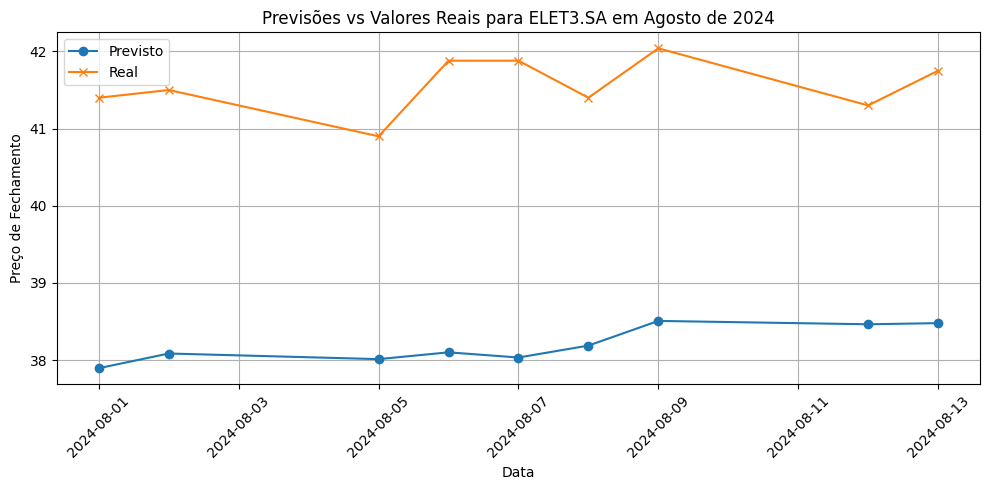

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Defina os papéis que você deseja analisar
tickers = ['AAPL', 'MSFT', 'PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 
           'BBAS3.SA', 'ABEV3.SA', 'B3SA3.SA', 'WEGE3.SA', 'RENT3.SA', 
           'JBSS3.SA', 'MGLU3.SA', 'BRFS3.SA', 'SUZB3.SA', 'ELET3.SA']  # Adicione os tickers desejados
start_date = '2015-01-01'
end_date = '2024-07-31'

# Baixar os dados históricos
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Preparar os dados para cada papel
def prepare_data(df):
    df['Date'] = df.index
    df['Return'] = df['Close'].pct_change()
    df['Moving_Average'] = df['Close'].rolling(window=5).mean()
    df['Volatility'] = df['Return'].rolling(window=5).std()
    df['RSI'] = compute_rsi(df['Close'])
    df.dropna(inplace=True)
    return df[['Date', 'Close', 'Moving_Average', 'Volatility', 'RSI']]

def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Preparar os dados
prepared_data = {}
for ticker in tickers:
    prepared_data[ticker] = prepare_data(data[ticker])

# Treinamento e teste para previsão
def train_and_predict(df, ticker):
    X = df[['Moving_Average', 'Volatility', 'RSI']]
    y = df['Close']

    # Divisão dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelo de Regressão Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Previsão
    y_pred = model.predict(X_test)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Modelo para {ticker}:')
    print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

    return model

# Treinamento e previsão para cada papel
models = {}
for ticker in tickers:
    models[ticker] = train_and_predict(prepared_data[ticker], ticker)

# Fazer previsões para agosto de 2024
future_dates = pd.date_range(start='2024-08-01', end='2024-08-31', freq='B')  # Dias úteis
future_data = pd.DataFrame(index=future_dates)

# Prever para cada papel
for ticker in tickers:
    predictions = []
    last_moving_average = prepared_data[ticker]['Moving_Average'].iloc[-1]
    last_volatility = prepared_data[ticker]['Volatility'].iloc[-1]
    last_rsi = prepared_data[ticker]['RSI'].iloc[-1]
    last_close = prepared_data[ticker]['Close'].iloc[-1]

    for date in future_dates:
        # Prever o próximo valor
        prediction = models[ticker].predict(np.array([[last_moving_average, last_volatility, last_rsi]]).reshape(1, -1))
        predictions.append(prediction[0])
        
        # Atualiza os dados para a próxima previsão
        new_row = pd.Series({
            'Moving_Average': last_moving_average,
            'Volatility': last_volatility,
            'RSI': last_rsi,
            'Close': prediction[0]
        }, name=date)
        
        prepared_data[ticker] = pd.concat([prepared_data[ticker], new_row.to_frame().T])

        # Atualizando os valores para a próxima iteração
        last_close = prediction[0]
        
        # Recalcula 'Return', 'Moving_Average', 'Volatility' e 'RSI'
        prepared_data[ticker]['Return'] = prepared_data[ticker]['Close'].pct_change()
        last_moving_average = prepared_data[ticker]['Close'].rolling(window=5).mean().iloc[-1]
        last_volatility = prepared_data[ticker]['Return'].rolling(window=5).std().iloc[-1]
        last_rsi = compute_rsi(prepared_data[ticker]['Close']).iloc[-1]

    future_data[ticker] = predictions

# Baixar dados reais para agosto de 2024
real_data = {}
for ticker in tickers:
    real_data[ticker] = yf.download(ticker, start='2024-08-01', end='2024-09-01')

# Preparar os dados reais
real_data_prepared = {}
for ticker in tickers:
    real_data_prepared[ticker] = prepare_data(real_data[ticker])

# Comparar previsões com dados reais
for ticker in tickers:
    actual_prices = real_data_prepared[ticker]['Close'].values[:len(future_data[ticker])]
    predicted_prices = future_data[ticker]

    # Garantir que ambos tenham o mesmo comprimento
    min_length = min(len(actual_prices), len(predicted_prices))

    comparison_df = pd.DataFrame({
        'Data': future_dates[:min_length],
        'Previsto': predicted_prices[:min_length],
        'Real': actual_prices[:min_length]
    })
    
    print(f'\nComparação para {ticker}:')
    print(comparison_df)

    # Plotar os resultados
    plt.figure(figsize=(10, 5))
    plt.plot(comparison_df['Data'], comparison_df['Previsto'], label='Previsto', marker='o')
    plt.plot(comparison_df['Data'], comparison_df['Real'], label='Real', marker='x')
    plt.title(f'Previsões vs Valores Reais para {ticker} em Agosto de 2024')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Defina os papéis que você deseja analisar
principais_papeis = [
    'PETR4.SA',  # Petrobras
    'VALE3.SA',  # Vale
    'ITUB4.SA',  # Itaú Unibanco
    'BBDC4.SA',  # Bradesco
    'BBAS3.SA',  # Banco do Brasil
    'ABEV3.SA',  # Ambev
    'B3SA3.SA',  # B3
    'WEGE3.SA',  # WEG
    'RENT3.SA',  # Localiza
    'JBSS3.SA',  # JBS
    'MGLU3.SA',  # Magazine Luiza
    'BRFS3.SA',  # BRF
    'SUZB3.SA',  # Suzano
    'GGBR4.SA',  # Gerdau
    'CSNA3.SA',  # CSN
    'LREN3.SA',  # Lojas Renner
    'RAIL3.SA',  # Rumo
    'KLBN11.SA', # Klabin
    'EGIE3.SA',  # Engie Brasil
    'ELET3.SA'   # Eletrobras
]

start_date = '2015-01-01'
end_date = '2024-07-31'

# Baixar os dados históricos
data = {}
for ticker in principais_papeis:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Preparar os dados para cada papel
def prepare_data(df):
    df['Date'] = df.index
    df['Return'] = df['Close'].pct_change()
    df['Moving_Average'] = df['Close'].rolling(window=5).mean()
    df['Volatility'] = df['Return'].rolling(window=5).std()
    df['RSI'] = compute_rsi(df['Close'])
    df['Volume'] = df['Volume']  # Adiciona o volume
    df.dropna(inplace=True)
    return df[['Date', 'Close', 'Moving_Average', 'Volatility', 'RSI', 'Volume']]

def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Preparar os dados
prepared_data = {}
for ticker in principais_papeis:
    prepared_data[ticker] = prepare_data(data[ticker])

# Treinamento e teste para previsão
def train_and_predict(df, ticker):
    X = df[['Moving_Average', 'Volatility', 'RSI', 'Volume']]
    y = df['Close']

    # Divisão dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Parâmetros para GridSearch
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # GridSearch para encontrar os melhores parâmetros
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Modelo otimizado
    model = grid_search.best_estimator_

    # Previsão
    y_pred = model.predict(X_test)

    # Avaliação
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Modelo para {ticker}:')
    print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

    return mse, mae, model

# Treinamento e previsão para cada papel
results = {}
for ticker in principais_papeis:
    mse, mae, model = train_and_predict(prepared_data[ticker], ticker)
    results[ticker] = {'MSE': mse, 'MAE': mae, 'Model': model}

# Analisando os resultados para encontrar o melhor papel
best_ticker = min(results, key=lambda x: results[x]['MSE'])
best_mse = results[best_ticker]['MSE']
best_mae = results[best_ticker]['MAE']

print(f'\nMelhor papel baseado no MSE: {best_ticker} com MSE: {best_mse:.2f} e MAE: {best_mae:.2f}')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Modelo para PETR4.SA:
MSE: 0.39, MAE: 0.40
Modelo para VALE3.SA:
MSE: 1.73, MAE: 0.90
Modelo para ITUB4.SA:
MSE: 0.21, MAE: 0.34
Modelo para BBDC4.SA:
MSE: 0.14, MAE: 0.26
Modelo para BBAS3.SA:
MSE: 0.16, MAE: 0.28
Modelo para ABEV3.SA:
MSE: 0.07, MAE: 0.19
Modelo para B3SA3.SA:
MSE: 0.08, MAE: 0.19
Modelo para WEGE3.SA:
MSE: 0.28, MAE: 0.32
Modelo para RENT3.SA:
MSE: 0.93, MAE: 0.62
Modelo para JBSS3.SA:
MSE: 0.29, MAE: 0.38
Modelo para MGLU3.SA:
MSE: 6.13, MAE: 1.37
Modelo para BRFS3.SA:
MSE: 0.46, MAE: 0.49
Modelo para SUZB3.SA:
MSE: 1.10, MAE: 0.79
Modelo para GGBR4.SA:
MSE: 0.15, MAE: 0.27
Modelo para CSNA3.SA:
MSE: 0.34, MAE: 0.37
Modelo para LREN3.SA:
MSE: 0.39, MAE: 0.45
Modelo para RAIL3.SA:
MSE: 0.13, MAE: 0.26
Modelo para KLBN11.SA:
MSE: 0.12, MAE: 0.26
Modelo para EGIE3.SA:
MSE: 0.28, MAE: 0.38
Modelo para ELET3.SA:
MSE: 0.70, MAE: 0.57

Melhor papel baseado no MSE: ABEV3.SA com MSE: 0.07 e MAE: 0.19
